In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split ,GridSearchCV, cross_val_score

In [3]:
from sklearn.impute import SimpleImputer

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('../Downloads/loan_prediction.csv')

In [6]:
data.shape

(614, 13)

In [7]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [9]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

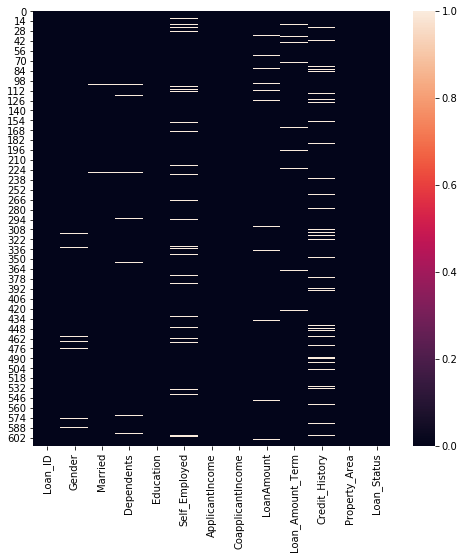

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(data.isnull())

In [11]:
data['Gender'].mode()

0    Male
dtype: object

In [12]:
data['Married'].mode()

0    Yes
dtype: object

In [13]:
data['Dependents'].mode()

0    0
dtype: object

In [14]:
data['Self_Employed'].mode()

0    No
dtype: object

In [15]:
np.unique(data['LoanAmount'])

array([  9.,  17.,  25.,  26.,  30.,  35.,  36.,  40.,  42.,  44.,  45.,
        46.,  47.,  48.,  50.,  53.,  54.,  55.,  56.,  58.,  59.,  60.,
        61.,  62.,  63.,  65.,  66.,  67.,  70.,  71.,  72.,  73.,  74.,
        75.,  76.,  78.,  80.,  81.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100., 101.,
       102., 103., 104., 105., 106., 107., 108., 109., 110., 111., 112.,
       113., 114., 115., 116., 117., 118., 119., 120., 121., 122., 123.,
       124., 125., 126., 127., 128., 129., 130., 131., 132., 133., 134.,
       135., 136., 137., 138., 139., 140., 141., 142., 143., 144., 145.,
       146., 148., 149., 150., 151., 152., 153., 154., 155., 156., 157.,
       158., 159., 160., 161., 162., 164., 165., 166., 167., 168., 170.,
       172., 173., 175., 176., 178., 180., 181., 182., 184., 185., 186.,
       187., 188., 190., 191., 192., 194., 196., 200., 201., 205., 207.,
       208., 209., 210., 211., 214., 216., 218., 22

In [16]:
int(data['LoanAmount'].mean())

146

In [17]:
int(data['Loan_Amount_Term'].mode())

360

In [18]:
np.unique(data['Loan_Amount_Term'])

array([ 12.,  36.,  60.,  84., 120., 180., 240., 300., 360., 480.,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan])

In [19]:
data[data['LoanAmount']==146]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
584,LP002911,Male,Yes,1,Graduate,No,2787,1917.0,146.0,360.0,0.0,Rural,N


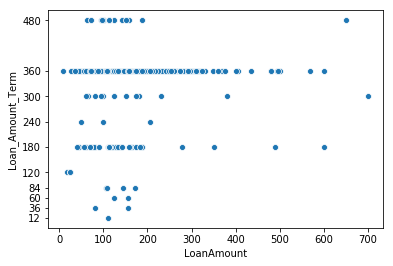

In [20]:
plt.yticks([ 12.,  36.,  60.,  84., 120., 180., 240., 300., 360., 480.])
sns.scatterplot(x=data['LoanAmount'],y=data['Loan_Amount_Term'],)

In [21]:
data['Credit_History'].mode()

0    1.0
dtype: float64

In [22]:
np.unique(data['Credit_History'])

array([ 0.,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

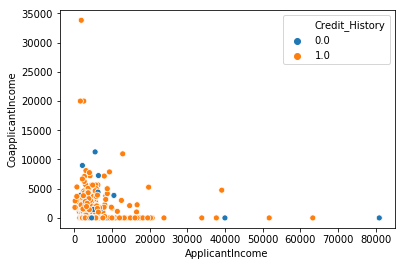

In [23]:
sns.scatterplot(x=data['ApplicantIncome'],y=data['CoapplicantIncome'],hue= data['Credit_History'])

In [24]:
data[20:30]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
20,LP001043,Male,Yes,0,Not Graduate,No,7660,0.0,104.0,360.0,0.0,Urban,N
21,LP001046,Male,Yes,1,Graduate,No,5955,5625.0,315.0,360.0,1.0,Urban,Y
22,LP001047,Male,Yes,0,Not Graduate,No,2600,1911.0,116.0,360.0,0.0,Semiurban,N
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
25,LP001066,Male,Yes,0,Graduate,Yes,9560,0.0,191.0,360.0,1.0,Semiurban,Y
26,LP001068,Male,Yes,0,Graduate,No,2799,2253.0,122.0,360.0,1.0,Semiurban,Y
27,LP001073,Male,Yes,2,Not Graduate,No,4226,1040.0,110.0,360.0,1.0,Urban,Y
28,LP001086,Male,No,0,Not Graduate,No,1442,0.0,35.0,360.0,1.0,Urban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y


In [25]:
most_frequent = SimpleImputer(strategy='most_frequent')
data['Gender']= most_frequent.fit_transform(data['Gender'].values.reshape(-1,1))
data['Married']= most_frequent.fit_transform(data['Married'].values.reshape(-1,1))
data['Dependents']= most_frequent.fit_transform(data['Dependents'].values.reshape(-1,1))
data['Self_Employed']= most_frequent.fit_transform(data['Self_Employed'].values.reshape(-1,1))
data['Loan_Amount_Term']= most_frequent.fit_transform(data['Loan_Amount_Term'].values.reshape(-1,1))
data['Credit_History']= most_frequent.fit_transform(data['Credit_History'].values.reshape(-1,1))

data[20:30]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
20,LP001043,Male,Yes,0,Not Graduate,No,7660,0.0,104.0,360.0,0.0,Urban,N
21,LP001046,Male,Yes,1,Graduate,No,5955,5625.0,315.0,360.0,1.0,Urban,Y
22,LP001047,Male,Yes,0,Not Graduate,No,2600,1911.0,116.0,360.0,0.0,Semiurban,N
23,LP001050,Male,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
24,LP001052,Male,Yes,1,Graduate,No,3717,2925.0,151.0,360.0,1.0,Semiurban,N
25,LP001066,Male,Yes,0,Graduate,Yes,9560,0.0,191.0,360.0,1.0,Semiurban,Y
26,LP001068,Male,Yes,0,Graduate,No,2799,2253.0,122.0,360.0,1.0,Semiurban,Y
27,LP001073,Male,Yes,2,Not Graduate,No,4226,1040.0,110.0,360.0,1.0,Urban,Y
28,LP001086,Male,No,0,Not Graduate,No,1442,0.0,35.0,360.0,1.0,Urban,N
29,LP001087,Female,No,2,Graduate,No,3750,2083.0,120.0,360.0,1.0,Semiurban,Y


In [26]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

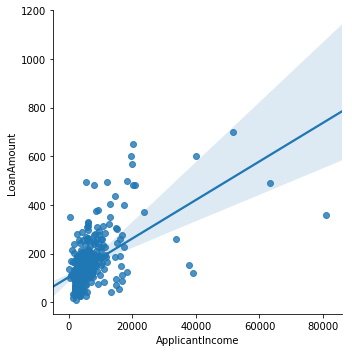

In [27]:
sns.lmplot(x='ApplicantIncome',y='LoanAmount',data=data)

In [28]:
data['LoanAmount'] = data['LoanAmount'].replace(np.NaN,int(data['LoanAmount'].mean()))

In [29]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [30]:
# checking numbers of unique value in each columns
uni = []
for col in data.columns:
    uni.append(len(np.unique(data[col])))
pd.DataFrame({"columns":data.columns,
             "Unique":uni})

,columns,Unique
0,Loan_ID,614
1,Gender,2
2,Married,2
3,Dependents,4
4,Education,2
5,Self_Employed,2
6,ApplicantIncome,505
7,CoapplicantIncome,287
8,LoanAmount,203
9,Loan_Amount_Term,10


In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le = LabelEncoder()

In [33]:
to_encode  = ['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']

In [34]:
for col in to_encode:
    data[col] = le.fit_transform(data[col])

In [35]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.0,8,1,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,8,1,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,8,1,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,8,1,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,8,1,2,1


In [36]:
data.drop(columns=['Loan_ID'],inplace=True)

In [37]:
X = data.drop(columns='Loan_Status')
y = data.iloc[:,-1].values
y = y.reshape(-1,1)
for x in range(101):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=x)
    logReg= LogisticRegression()
    logReg.fit(Xtrain,ytrain)
    pre = logReg.predict(Xtest)
    if (accuracy_score(ytest,pre)>0.85):
        print(x)
        print(accuracy_score(ytest,pre))
        print(confusion_matrix(ytest,pre))
        print(classification_report(ytest,pre))

8
0.8571428571428571
[[ 30  27]
 [  2 144]]
              precision    recall  f1-score   support

           0       0.94      0.53      0.67        57
           1       0.84      0.99      0.91       146

   micro avg       0.86      0.86      0.86       203
   macro avg       0.89      0.76      0.79       203
weighted avg       0.87      0.86      0.84       203

13
0.8571428571428571
[[ 25  28]
 [  1 149]]
              precision    recall  f1-score   support

           0       0.96      0.47      0.63        53
           1       0.84      0.99      0.91       150

   micro avg       0.86      0.86      0.86       203
   macro avg       0.90      0.73      0.77       203
weighted avg       0.87      0.86      0.84       203

39
0.8522167487684729
[[ 29  29]
 [  1 144]]
              precision    recall  f1-score   support

           0       0.97      0.50      0.66        58
           1       0.83      0.99      0.91       145

   micro avg       0.85      0.85      0.85     

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()

In [40]:
to_scale = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

In [41]:
for col in to_scale:
    data[col] = scaler.fit_transform(data[col].values.reshape(-1,1))

In [42]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.070489,0.000000,0.198263,8,1,2,1
1,1,1,1,0,0,0.054830,0.036192,0.172214,8,1,0,0
2,1,1,0,0,1,0.035250,0.000000,0.082489,8,1,2,1
3,1,1,0,1,0,0.030093,0.056592,0.160637,8,1,2,1
4,1,0,0,0,0,0.072356,0.000000,0.191027,8,1,2,1


In [43]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.070489,0.000000,0.198263,8,1,2,1
1,1,1,1,0,0,0.054830,0.036192,0.172214,8,1,0,0
2,1,1,0,0,1,0.035250,0.000000,0.082489,8,1,2,1
3,1,1,0,1,0,0.030093,0.056592,0.160637,8,1,2,1
4,1,0,0,0,0,0.072356,0.000000,0.191027,8,1,2,1


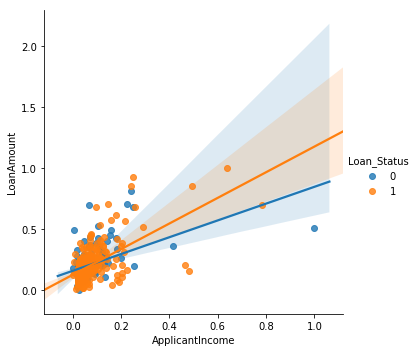

In [44]:
sns.lmplot(x='ApplicantIncome',y='LoanAmount',data=data,hue= 'Loan_Status')

### Logistic Regression

In [45]:
X = data.drop(columns='Loan_Status')
y = data.iloc[:,-1].values
y = y.reshape(-1,1)
for x in range(101):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=x,stratify=y)
    logReg= LogisticRegression()
    logReg.fit(Xtrain,ytrain)
    pre = logReg.predict(Xtest)
    if (accuracy_score(ytest,pre)>0.85):
        print(x)
        print(accuracy_score(ytest,pre))
        print(confusion_matrix(ytest,pre))
        print(classification_report(ytest,pre))

16
0.8669950738916257
[[ 37  26]
 [  1 139]]
              precision    recall  f1-score   support

           0       0.97      0.59      0.73        63
           1       0.84      0.99      0.91       140

   micro avg       0.87      0.87      0.87       203
   macro avg       0.91      0.79      0.82       203
weighted avg       0.88      0.87      0.86       203



In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=16,stratify=y)

In [47]:
X_train.shape

(411, 11)

In [48]:
y_train.shape

(411, 1)

In [49]:
lr= LogisticRegression()

In [50]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
pred= lr.predict(X_test)

In [52]:
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8669950738916257
[[ 37  26]
 [  1 139]]
              precision    recall  f1-score   support

           0       0.97      0.59      0.73        63
           1       0.84      0.99      0.91       140

   micro avg       0.87      0.87      0.87       203
   macro avg       0.91      0.79      0.82       203
weighted avg       0.88      0.87      0.86       203



### Cross Validation Score

In [53]:
log_reg = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 60)
log_reg.mean()

0.7795634920634922

### Decision Tree Classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
def maxDepthDT(depth):
    dt = DecisionTreeClassifier(max_depth=depth,random_state=16)
    dt.fit(X_train,y_train)
    dt_predict = dt.predict(X_test)
    return (dt.score(X_train,y_train)),dt.score(X_test,y_test)

In [59]:
# custom plot function
def listPlot(lis,n):
    plt.figure()
    plt.plot([x * 100 for x in lis])
    plt.xlabel('N value')
    plt.ylabel('(%)')
    plt.title("X = {} Y = {}".format([x for x in range(n)][np.argmax(lis)], (max(lis)*100)))
    plt.axhline(y=(max(lis)*100),color = 'r', linestyle = '--')
    plt.axvline(x=[x for x in range(n)][np.argmax(lis)],color = 'g', linestyle = '--')
    plt.show()

In [60]:
train_acc = []
validate_acc = []
for i in range(1,51):
    train_a,val_a = maxDepthDT(i)
    train_acc.append(train_a)
    validate_acc.append(val_a)

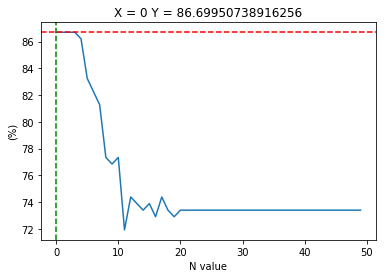

In [61]:
listPlot(validate_acc,100)

In [62]:
trade = pd.DataFrame({
    'max depth':range(1,51),
    'training acc':train_acc,
    'validation acc':validate_acc
})
trade.head()

,max depth,training acc,validation acc
0,1,0.781022,0.866995
1,2,0.790754,0.866995
2,3,0.790754,0.866995
3,4,0.802920,0.866995
4,5,0.812652,0.862069


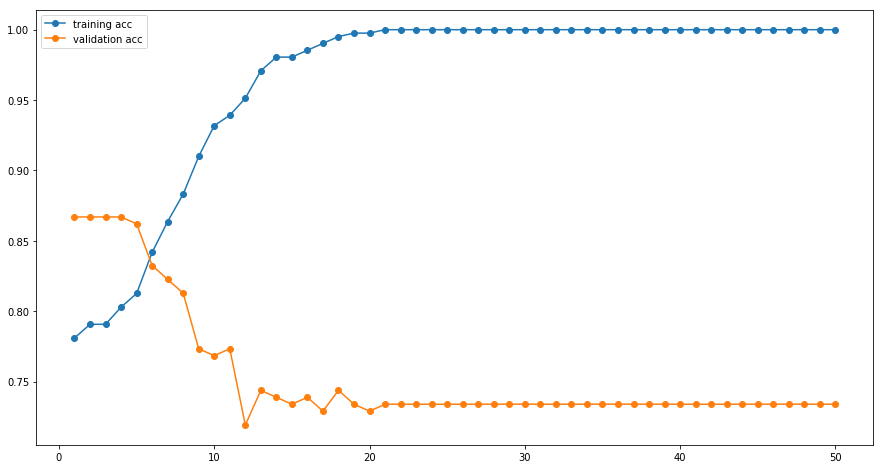

In [63]:
plt.figure(figsize=(15,8))
plt.plot(trade['max depth'],trade['training acc'],marker='o')
plt.plot(trade['max depth'],trade['validation acc'],marker='o')
plt.legend()

In [64]:
dt = DecisionTreeClassifier(random_state=31,max_depth=6)
dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test)
dt.score(X_train,y_train)*100

84.18491484184915

In [65]:
#print confusion matrix and accuracy score
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print(dt_conf_matrix)
print(dt_acc_score*100)

[[ 34  29]
 [  5 135]]
83.2512315270936


### Random Forest Classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rfc = RandomForestClassifier()

In [68]:
rfc = RandomForestClassifier(n_estimators=71,criterion='gini',random_state=8,max_depth=4)
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)
rfc.score(X_train,y_train)*100

79.07542579075427

In [69]:
rfc_conf_matrix = confusion_matrix(y_test, rfc_predict)
rfc_acc_score = accuracy_score(y_test, rfc_predict)
print(rfc_conf_matrix)
print(rfc_acc_score*100)

[[ 37  26]
 [  1 139]]
86.69950738916256


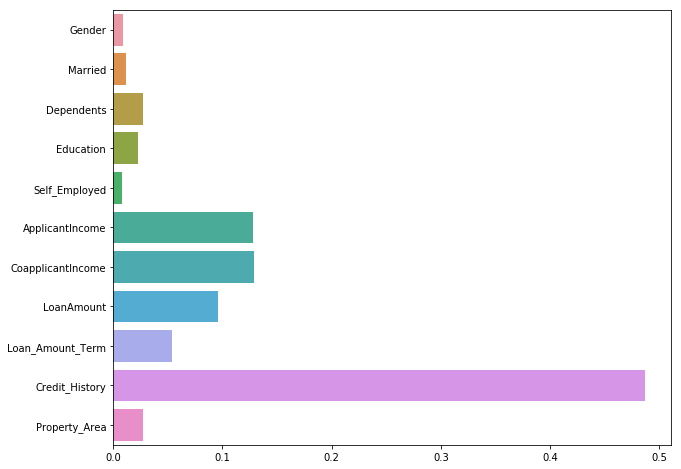

In [70]:
plt.figure(figsize=(10,8))
sns.barplot(x =rfc.feature_importances_,y=data.columns[:-1])

### Support Vector Classification

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
from sklearn.svm import SVC

In [78]:
#we shall use the rbf kernel first and check the accuracy
lin_svc = SVC(kernel='linear')
lin_svc.fit(X_train, y_train)
lin_svc_pred=lin_svc.predict(X_test)

In [79]:
#print confusion matrix and accuracy score
lin_svc_conf_matrix = confusion_matrix(y_test, lin_svc_pred)
lin_svc_acc_score = accuracy_score(y_test, lin_svc_pred)
print(lin_svc_conf_matrix)
print(lin_svc_acc_score*100)

[[ 37  26]
 [  1 139]]
86.69950738916256


In [81]:
rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X_train, y_train)
rbf_svc_pred=rbf_svc.predict(X_test)

In [82]:
rbf_svc_conf_matrix = confusion_matrix(y_test, rbf_svc_pred)
rbf_svc_acc_score = accuracy_score(y_test, rbf_svc_pred)
print(rbf_svc_conf_matrix)
print(rbf_svc_acc_score*100)

[[ 37  26]
 [  1 139]]
86.69950738916256


### Gradient Boosting Classifier

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

In [100]:
def randState(n):
    gbc = GradientBoostingClassifier(random_state=3,n_estimators=n*10)
    gbc.fit(X_train,y_train)
    gbc_predict = gbc.predict(X_test)
    return (gbc.score(X_train,y_train)),gbc.score(X_test,y_test)

In [101]:
train_ac = []
validate_ac = []
for i in range(1,16):
    train_a,val_a = randState(i)
    train_ac.append(train_a)
    validate_ac.append(val_a)

In [102]:
trade_n = pd.DataFrame({
    'n_estimator':[x*10 for x in range(1,16)],
    'training acc':train_ac,
    'validation acc':validate_ac
})
trade_n.head(10)

,n_estimator,training acc,validation acc
0,10,0.795620,0.866995
1,20,0.795620,0.866995
2,30,0.810219,0.866995
3,40,0.815085,0.866995
4,50,0.822384,0.866995
5,60,0.834550,0.866995
6,70,0.844282,0.857143
7,80,0.854015,0.862069
8,90,0.868613,0.862069
9,100,0.880779,0.857143


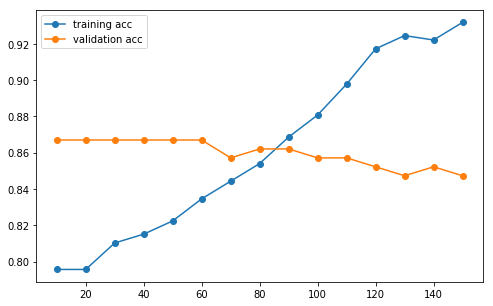

In [103]:
plt.figure(figsize=(8,5))
plt.plot(trade_n['n_estimator'],trade_n['training acc'],marker='o')
plt.plot(trade_n['n_estimator'],trade_n['validation acc'],marker='o')
plt.legend()

In [104]:
gbc = GradientBoostingClassifier(random_state=3,n_estimators=85)
gbc.fit(X_train,y_train)
gbc.score(X_train,y_train),gbc.score(X_test,y_test)

(0.8686131386861314, 0.8669950738916257)

### XG Boost Classifier

In [105]:
from xgboost import XGBClassifier

In [106]:
xgbc = XGBClassifier(random_state=3,colsample_bytree=0.7,max_depth=4)
xgbc.fit(X_train,y_train)
xgbc.score(X_train,y_train),xgbc.score(X_test,y_test)

(0.9075425790754258, 0.8571428571428571)

### Ada Boost Classifier

In [107]:
from sklearn.ensemble import AdaBoostClassifier

In [108]:
abc = AdaBoostClassifier(random_state=34,base_estimator=RandomForestClassifier(random_state=34),n_estimators=100,learning_rate=0.01)
abc.fit(X_train,y_train)
abc.score(X_train,y_train),abc.score(X_test,y_test)

(1.0, 0.8374384236453202)